In [1]:
!pip install -U albumentations
!pip install gitpython

     |████████████████████████████████| 102 kB 6.7 MB/s 
     |████████████████████████████████| 47.6 MB 123 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
     |████████████████████████████████| 180 kB 5.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 


In [2]:
import git
import os
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

In [3]:
os.chdir("/content/")

In [4]:
if os.path.isdir("/content/Transformer-DeepLearning"):
  !rm -rf "/content/Transformer-DeepLearning"

In [5]:
!git clone https://github.com/amitkml/Transformer-DeepLearning 

Cloning into 'Transformer-DeepLearning'...
remote: Enumerating objects: 828, done.
remote: Counting objects: 100% (828/828), done.
remote: Compressing objects: 100% (601/601), done.
remote: Total 828 (delta 487), reused 515 (delta 213), pack-reused 0
Receiving objects: 100% (828/828), 22.35 MiB | 27.51 MiB/s, done.
Resolving deltas: 100% (487/487), done.


In [6]:
os.chdir("/content/Transformer-DeepLearning/ConvModelAdvancedTraining/models")
# import resnet as resnet
# import resnet_ln as resnet_ln
import resnet_custom as resnet_custom

In [7]:
!pip install torchsummary
from torchsummary import summary

In [8]:
os.chdir("/content/Transformer-DeepLearning/ConvModelAdvancedTraining")
# %tb
import utils as utils
import main as model_main
import lr_finder as lr_finder

### LR finder

Got all parser argument
================================================> Preparing data................


No traceback available to show.


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
===========================================================> Building model Custom resnet...............
CustomResNet(
  (prep_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): 

  0%|          | 0/480 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.64E-01


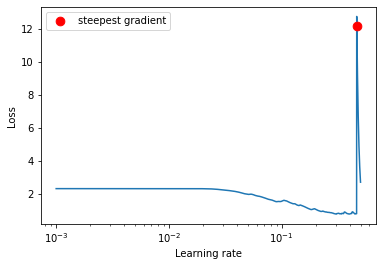

In [ ]:
%tb
max_lr = lr_finder.lr_finder_ls()

In [ ]:
start_lr = 1e-3
print(f"Max LR forund from LR Finder:{start_lr}")
max_lr = max_lr[-1]/10


Max LR forund from LR Finder:0.001


In [ ]:
start_lr = 1e-3
# max_lr = 0.0172685370741483 (Working with 87%)
max_lr = 0.272685370741483  # 0.009746555323590814

### Visualize Network Architecture


In [10]:
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [11]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [12]:
my_model = model_main.get_model()

CustomResNetFC(
  (prep_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (dp1): Dropout2d(p=0.005, inplace

In [14]:
!pip install hiddenlayer

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_helper.py:258: UserWarning: ONNX export failed on feature_dropout because training mode not supported
  warnings.warn("ONNX export failed on " + op + " because " + msg + " not supported")


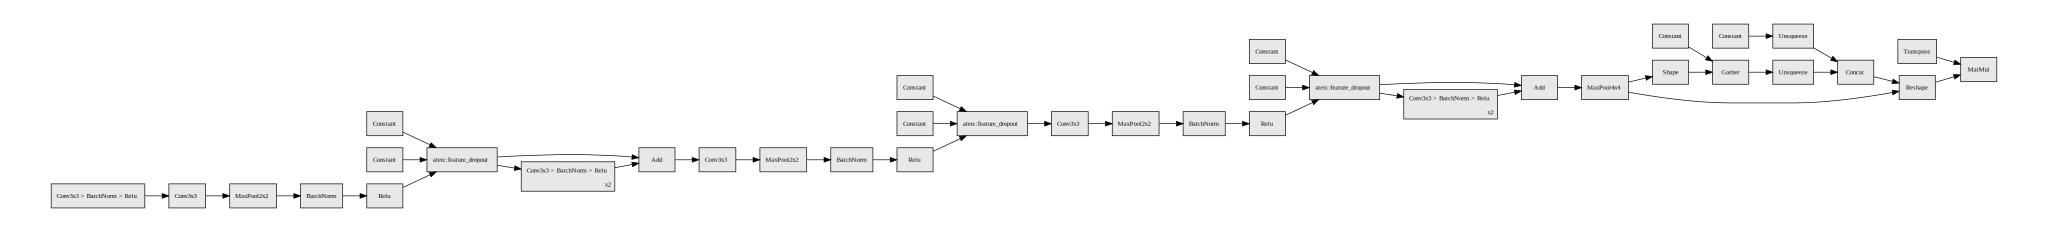

In [15]:
import hiddenlayer as hl
input = torch.zeros([1, 3, 32, 32])
hl.build_graph(my_model, input.to(device))

## Experiments

### Experimenting with SGD

Got all parser argument
================================================> Preparing data................
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
===========================================================> Building model Custom resnet.=========================================..............
CustomResNet(
  (prep_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), 

Loss=1.3286055326461792 Batch_id=97  LR=0.01363 Accuracy=38.46: 100%|██████████| 98/98 [00:52<00:00,  1.88it/s]
Loss=1.3642845153808594 Batch_id=19 LR=0.01363 Accuracy=54.59: 100%|██████████| 20/20 [00:04<00:00,  4.97it/s]


Saving..
Adjusting learning rate of group 0 to 1.3637e-02.

Epoch: 1


Loss=0.9819514155387878 Batch_id=97  LR=0.01364 Accuracy=58.24: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=1.11630380153656 Batch_id=19 LR=0.01364 Accuracy=64.11: 100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


Saving..
Adjusting learning rate of group 0 to 1.3645e-02.

Epoch: 2


Loss=0.7288237810134888 Batch_id=97  LR=0.01364 Accuracy=68.19: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.8754950165748596 Batch_id=19 LR=0.01364 Accuracy=73.33: 100%|██████████| 20/20 [00:04<00:00,  4.94it/s]


Saving..
Adjusting learning rate of group 0 to 1.3658e-02.

Epoch: 3


Loss=0.751386821269989 Batch_id=97  LR=0.01366 Accuracy=73.73: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.6895487308502197 Batch_id=19 LR=0.01366 Accuracy=77.54: 100%|██████████| 20/20 [00:04<00:00,  4.95it/s]


Saving..
Adjusting learning rate of group 0 to 1.3677e-02.

Epoch: 4


Loss=0.6116072535514832 Batch_id=97  LR=0.01368 Accuracy=77.35: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.6312600374221802 Batch_id=19 LR=0.01368 Accuracy=80.79: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


Saving..
Adjusting learning rate of group 0 to 1.3701e-02.

Epoch: 5


Loss=0.6062972545623779 Batch_id=97  LR=0.01370 Accuracy=79.71: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.4955826997756958 Batch_id=19 LR=0.01370 Accuracy=82.57: 100%|██████████| 20/20 [00:04<00:00,  4.83it/s]


Saving..
Adjusting learning rate of group 0 to 1.3730e-02.

Epoch: 6


Loss=0.5350529551506042 Batch_id=97  LR=0.01373 Accuracy=81.68: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.4979308545589447 Batch_id=19 LR=0.01373 Accuracy=82.83: 100%|██████████| 20/20 [00:03<00:00,  5.02it/s]


Saving..
Adjusting learning rate of group 0 to 1.3765e-02.

Epoch: 7


Loss=0.486337810754776 Batch_id=97  LR=0.01377 Accuracy=83.01: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.4732119143009186 Batch_id=19 LR=0.01377 Accuracy=85.07: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


Saving..
Adjusting learning rate of group 0 to 1.3805e-02.

Epoch: 8


Loss=0.44058114290237427 Batch_id=97  LR=0.01381 Accuracy=84.34: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.4738975465297699 Batch_id=19 LR=0.01381 Accuracy=85.42: 100%|██████████| 20/20 [00:04<00:00,  4.95it/s]


Saving..
Adjusting learning rate of group 0 to 1.3851e-02.

Epoch: 9


Loss=0.3530585467815399 Batch_id=97  LR=0.01385 Accuracy=85.59: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.44279834628105164 Batch_id=19 LR=0.01385 Accuracy=85.89: 100%|██████████| 20/20 [00:03<00:00,  5.02it/s]


Saving..
Adjusting learning rate of group 0 to 1.3901e-02.

Epoch: 10


Loss=0.4318418502807617 Batch_id=97  LR=0.01390 Accuracy=86.26: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.40436437726020813 Batch_id=19 LR=0.01390 Accuracy=86.45: 100%|██████████| 20/20 [00:04<00:00,  4.94it/s]


Saving..
Adjusting learning rate of group 0 to 1.3958e-02.

Epoch: 11


Loss=0.4453912377357483 Batch_id=97  LR=0.01396 Accuracy=87.23: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.43796873092651367 Batch_id=19 LR=0.01396 Accuracy=85.54: 100%|██████████| 20/20 [00:03<00:00,  5.03it/s]


Adjusting learning rate of group 0 to 1.4019e-02.

Epoch: 12


Loss=0.3700789511203766 Batch_id=97  LR=0.01402 Accuracy=87.85: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.3744039833545685 Batch_id=19 LR=0.01402 Accuracy=86.94: 100%|██████████| 20/20 [00:04<00:00,  5.00it/s]


Saving..
Adjusting learning rate of group 0 to 1.4086e-02.

Epoch: 13


Loss=0.3238861560821533 Batch_id=97  LR=0.01409 Accuracy=88.27: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.4022725522518158 Batch_id=19 LR=0.01409 Accuracy=87.78: 100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


Saving..
Adjusting learning rate of group 0 to 1.4158e-02.

Epoch: 14


Loss=0.3269023299217224 Batch_id=97  LR=0.01416 Accuracy=88.99: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.4087802767753601 Batch_id=19 LR=0.01416 Accuracy=87.15: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


Adjusting learning rate of group 0 to 1.4235e-02.

Epoch: 15


Loss=0.3360343277454376 Batch_id=97  LR=0.01424 Accuracy=89.48: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.37537717819213867 Batch_id=19 LR=0.01424 Accuracy=87.55: 100%|██████████| 20/20 [00:04<00:00,  4.97it/s]


Adjusting learning rate of group 0 to 1.4318e-02.

Epoch: 16


Loss=0.30777907371520996 Batch_id=97  LR=0.01432 Accuracy=89.70: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.40739285945892334 Batch_id=19 LR=0.01432 Accuracy=88.05: 100%|██████████| 20/20 [00:04<00:00,  4.88it/s]


Saving..
Adjusting learning rate of group 0 to 1.4406e-02.

Epoch: 17


Loss=0.30210551619529724 Batch_id=97  LR=0.01441 Accuracy=90.28: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.40365567803382874 Batch_id=19 LR=0.01441 Accuracy=88.17: 100%|██████████| 20/20 [00:04<00:00,  4.93it/s]


Saving..
Adjusting learning rate of group 0 to 1.4499e-02.

Epoch: 18


Loss=0.24850666522979736 Batch_id=97  LR=0.01450 Accuracy=90.84: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.36792969703674316 Batch_id=19 LR=0.01450 Accuracy=88.45: 100%|██████████| 20/20 [00:04<00:00,  4.97it/s]


Saving..
Adjusting learning rate of group 0 to 1.4598e-02.

Epoch: 19


Loss=0.286437064409256 Batch_id=97  LR=0.01460 Accuracy=91.10: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.394625723361969 Batch_id=19 LR=0.01460 Accuracy=88.47: 100%|██████████| 20/20 [00:04<00:00,  4.91it/s]


Saving..
Adjusting learning rate of group 0 to 1.4702e-02.

Epoch: 20


Loss=0.2809191644191742 Batch_id=97  LR=0.01470 Accuracy=91.39: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.3442245423793793 Batch_id=19 LR=0.01470 Accuracy=88.96: 100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


Saving..
Adjusting learning rate of group 0 to 1.4811e-02.

Epoch: 21


Loss=0.2648541033267975 Batch_id=97  LR=0.01481 Accuracy=91.71: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
Loss=0.34203609824180603 Batch_id=19 LR=0.01481 Accuracy=88.60: 100%|██████████| 20/20 [00:04<00:00,  4.97it/s]


Adjusting learning rate of group 0 to 1.4926e-02.

Epoch: 22


Loss=0.2702557146549225 Batch_id=97  LR=0.01493 Accuracy=91.94: 100%|██████████| 98/98 [00:52<00:00,  1.86it/s]
Loss=0.34372588992118835 Batch_id=19 LR=0.01493 Accuracy=88.97: 100%|██████████| 20/20 [00:04<00:00,  4.93it/s]


Saving..
Adjusting learning rate of group 0 to 1.5046e-02.

Epoch: 23


Loss=0.2633213400840759 Batch_id=97  LR=0.01505 Accuracy=92.20: 100%|██████████| 98/98 [00:52<00:00,  1.86it/s]
Loss=0.3801964521408081 Batch_id=19 LR=0.01505 Accuracy=89.04: 100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


Saving..
Adjusting learning rate of group 0 to 1.5171e-02.
============================================================ Training and Testing Performance ==============================================================


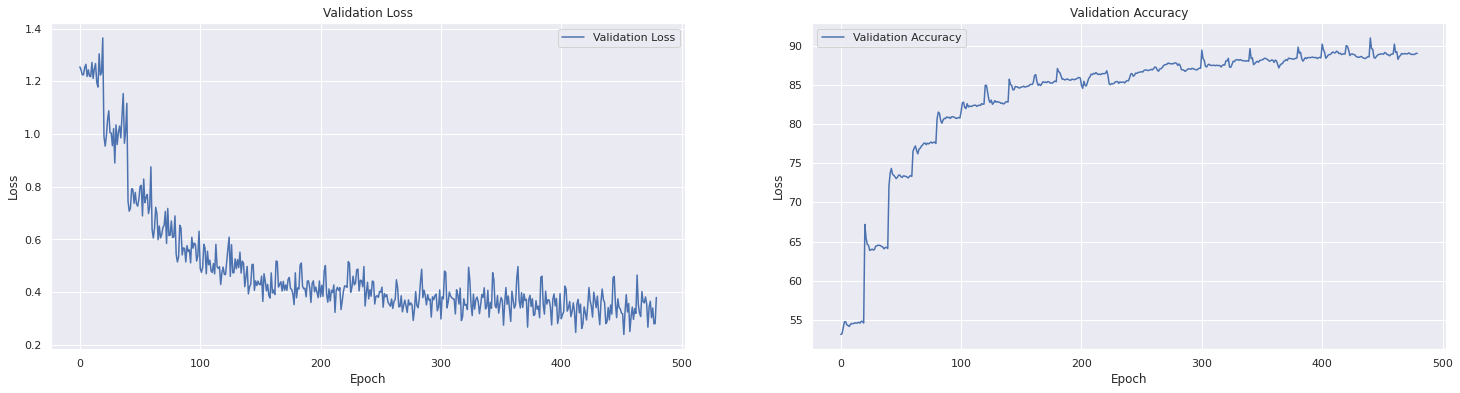

============================================================= Class Level Accuracy =========================================================================
Accuracy of airplane : 85 %
Accuracy of automobile : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 50 %
Accuracy of  deer : 100 %
Accuracy of   dog : 66 %
Accuracy of  frog : 81 %
Accuracy of horse : 100 %
Accuracy of  ship : 91 %
Accuracy of truck : 100 %
============================================== Random Misclassified Images ================================================================================


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 1096


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


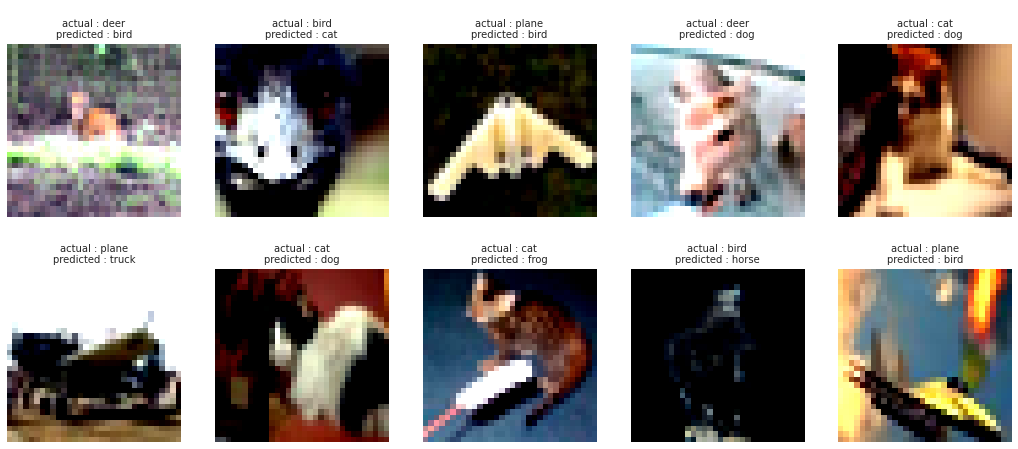

============================================== Grdadcam Misclassified Images =============================================================================
torch.Size([20, 10])
Generating Grad-CAM @conv_layer_1


ValueError: ignored

In [ ]:
model_main.run_experiments_custom_resnet(start_lr = start_lr, lrmax = max_lr)

### Experimenting with Adam

In [ ]:
start_lr = 1e-3
# max_lr = 0.0172685370741483 (Working with 87%)
max_lr = 0.012272685370741483  # 0.009746555323590814

Got all parser argument
================================================> Preparing data................


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
===========================================================> Building model Custom resnet.=========================================..............
CustomResNet(
  (prep_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True

Loss=1.210721492767334 Batch_id=97  LR=0.00061 Accuracy=42.94: 100%|██████████| 98/98 [00:57<00:00,  1.72it/s]
Loss=1.3274480104446411 Batch_id=19 LR=0.00061 Accuracy=56.74: 100%|██████████| 20/20 [00:04<00:00,  4.64it/s]


Saving..
Adjusting learning rate of group 0 to 6.1375e-04.

Epoch: 1


Loss=0.943604052066803 Batch_id=97  LR=0.00061 Accuracy=61.83: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.9330930709838867 Batch_id=19 LR=0.00061 Accuracy=70.14: 100%|██████████| 20/20 [00:04<00:00,  4.64it/s]


Saving..
Adjusting learning rate of group 0 to 6.1412e-04.

Epoch: 2


Loss=0.7590773701667786 Batch_id=97  LR=0.00061 Accuracy=71.12: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.8019246459007263 Batch_id=19 LR=0.00061 Accuracy=75.64: 100%|██████████| 20/20 [00:04<00:00,  4.69it/s]


Saving..
Adjusting learning rate of group 0 to 6.1472e-04.

Epoch: 3


Loss=0.6863560676574707 Batch_id=97  LR=0.00061 Accuracy=76.41: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.6486554145812988 Batch_id=19 LR=0.00061 Accuracy=80.54: 100%|██████████| 20/20 [00:04<00:00,  4.63it/s]


Saving..
Adjusting learning rate of group 0 to 6.1556e-04.

Epoch: 4


Loss=0.6380743980407715 Batch_id=97  LR=0.00062 Accuracy=79.24: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
Loss=0.5703731775283813 Batch_id=19 LR=0.00062 Accuracy=83.28: 100%|██████████| 20/20 [00:04<00:00,  4.64it/s]


Saving..
Adjusting learning rate of group 0 to 6.1664e-04.

Epoch: 5


Loss=0.5276772379875183 Batch_id=97  LR=0.00062 Accuracy=81.48: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
Loss=0.5457762479782104 Batch_id=19 LR=0.00062 Accuracy=83.52: 100%|██████████| 20/20 [00:04<00:00,  4.62it/s]


Saving..
Adjusting learning rate of group 0 to 6.1796e-04.

Epoch: 6


Loss=0.5289353728294373 Batch_id=97  LR=0.00062 Accuracy=82.81: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
Loss=0.5101906657218933 Batch_id=19 LR=0.00062 Accuracy=82.51: 100%|██████████| 20/20 [00:04<00:00,  4.62it/s]


Adjusting learning rate of group 0 to 6.1953e-04.

Epoch: 7


Loss=0.4238527715206146 Batch_id=97  LR=0.00062 Accuracy=83.86: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
Loss=0.49774664640426636 Batch_id=19 LR=0.00062 Accuracy=85.65: 100%|██████████| 20/20 [00:04<00:00,  4.61it/s]


Saving..
Adjusting learning rate of group 0 to 6.2133e-04.

Epoch: 8


Loss=0.3538345396518707 Batch_id=97  LR=0.00062 Accuracy=84.92: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
Loss=0.4683462083339691 Batch_id=19 LR=0.00062 Accuracy=85.94: 100%|██████████| 20/20 [00:04<00:00,  4.63it/s]


Saving..
Adjusting learning rate of group 0 to 6.2338e-04.

Epoch: 9


Loss=0.44597887992858887 Batch_id=97  LR=0.00062 Accuracy=85.86: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
Loss=0.44656211137771606 Batch_id=19 LR=0.00062 Accuracy=87.00: 100%|██████████| 20/20 [00:04<00:00,  4.64it/s]


Saving..
Adjusting learning rate of group 0 to 6.2566e-04.

Epoch: 10


Loss=0.4157552123069763 Batch_id=97  LR=0.00063 Accuracy=86.58: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
Loss=0.40032172203063965 Batch_id=19 LR=0.00063 Accuracy=86.83: 100%|██████████| 20/20 [00:04<00:00,  4.60it/s]


Adjusting learning rate of group 0 to 6.2819e-04.

Epoch: 11


Loss=0.3033781945705414 Batch_id=97  LR=0.00063 Accuracy=86.90: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
Loss=0.4779168963432312 Batch_id=19 LR=0.00063 Accuracy=87.75: 100%|██████████| 20/20 [00:04<00:00,  4.59it/s]


Saving..
Adjusting learning rate of group 0 to 6.3095e-04.

Epoch: 12


Loss=0.4121357500553131 Batch_id=97  LR=0.00063 Accuracy=87.29: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
Loss=0.42474475502967834 Batch_id=19 LR=0.00063 Accuracy=88.25: 100%|██████████| 20/20 [00:04<00:00,  4.60it/s]


Saving..
Adjusting learning rate of group 0 to 6.3395e-04.

Epoch: 13


Loss=0.3986794054508209 Batch_id=97  LR=0.00063 Accuracy=88.12: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
Loss=0.4056990146636963 Batch_id=19 LR=0.00063 Accuracy=88.06: 100%|██████████| 20/20 [00:04<00:00,  4.61it/s]


Adjusting learning rate of group 0 to 6.3720e-04.

Epoch: 14


Loss=0.3590635657310486 Batch_id=97  LR=0.00064 Accuracy=88.33: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
Loss=0.41077467799186707 Batch_id=19 LR=0.00064 Accuracy=87.66: 100%|██████████| 20/20 [00:04<00:00,  4.62it/s]


Adjusting learning rate of group 0 to 6.4068e-04.

Epoch: 15


Loss=0.3451331555843353 Batch_id=97  LR=0.00064 Accuracy=88.67: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.3571842312812805 Batch_id=19 LR=0.00064 Accuracy=89.00: 100%|██████████| 20/20 [00:04<00:00,  4.63it/s]


Saving..
Adjusting learning rate of group 0 to 6.4441e-04.

Epoch: 16


Loss=0.278984397649765 Batch_id=97  LR=0.00064 Accuracy=89.01: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.3821813464164734 Batch_id=19 LR=0.00064 Accuracy=88.03: 100%|██████████| 20/20 [00:04<00:00,  4.66it/s]


Adjusting learning rate of group 0 to 6.4837e-04.

Epoch: 17


Loss=0.36955344676971436 Batch_id=97  LR=0.00065 Accuracy=89.49: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.42285558581352234 Batch_id=19 LR=0.00065 Accuracy=86.89: 100%|██████████| 20/20 [00:04<00:00,  4.66it/s]


Adjusting learning rate of group 0 to 6.5257e-04.

Epoch: 18


Loss=0.28045058250427246 Batch_id=97  LR=0.00065 Accuracy=89.46: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.3942261338233948 Batch_id=19 LR=0.00065 Accuracy=87.75: 100%|██████████| 20/20 [00:04<00:00,  4.65it/s]


Adjusting learning rate of group 0 to 6.5701e-04.

Epoch: 19


Loss=0.31233713030815125 Batch_id=97  LR=0.00066 Accuracy=89.78: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.33402642607688904 Batch_id=19 LR=0.00066 Accuracy=89.15: 100%|██████████| 20/20 [00:04<00:00,  4.65it/s]


Saving..
Adjusting learning rate of group 0 to 6.6169e-04.

Epoch: 20


Loss=0.2341454178094864 Batch_id=97  LR=0.00066 Accuracy=89.91: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.35892853140830994 Batch_id=19 LR=0.00066 Accuracy=89.22: 100%|██████████| 20/20 [00:04<00:00,  4.64it/s]


Saving..
Adjusting learning rate of group 0 to 6.6661e-04.

Epoch: 21


Loss=0.335405170917511 Batch_id=97  LR=0.00067 Accuracy=90.31: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.3393045961856842 Batch_id=19 LR=0.00067 Accuracy=89.07: 100%|██████████| 20/20 [00:04<00:00,  4.66it/s]


Adjusting learning rate of group 0 to 6.7177e-04.

Epoch: 22


Loss=0.2988474369049072 Batch_id=97  LR=0.00067 Accuracy=90.18: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.305076003074646 Batch_id=19 LR=0.00067 Accuracy=90.00: 100%|██████████| 20/20 [00:04<00:00,  4.68it/s]


Saving..
Adjusting learning rate of group 0 to 6.7716e-04.

Epoch: 23


Loss=0.3170669972896576 Batch_id=97  LR=0.00068 Accuracy=90.57: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.34307682514190674 Batch_id=19 LR=0.00068 Accuracy=89.59: 100%|██████████| 20/20 [00:04<00:00,  4.63it/s]


Adjusting learning rate of group 0 to 6.8279e-04.
============================================================ Training and Testing Performance ==============================================================


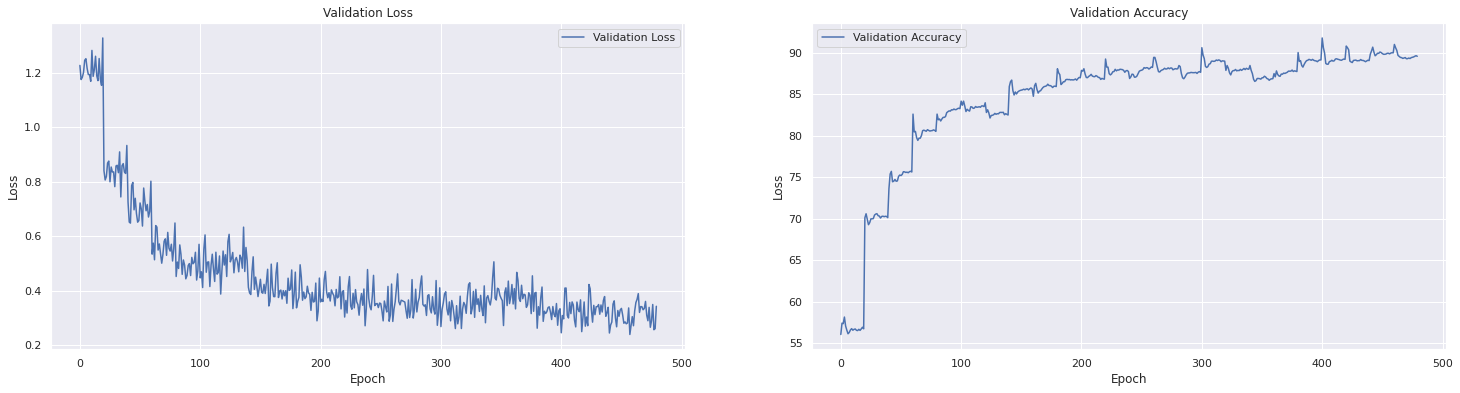

============================================================= Class Level Accuracy =========================================================================
Accuracy of airplane : 85 %
Accuracy of automobile : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 58 %
Accuracy of  deer : 100 %
Accuracy of   dog : 66 %
Accuracy of  frog : 100 %
Accuracy of horse : 83 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %
============================================== Random Misclassified Images ================================================================================


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 1041


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


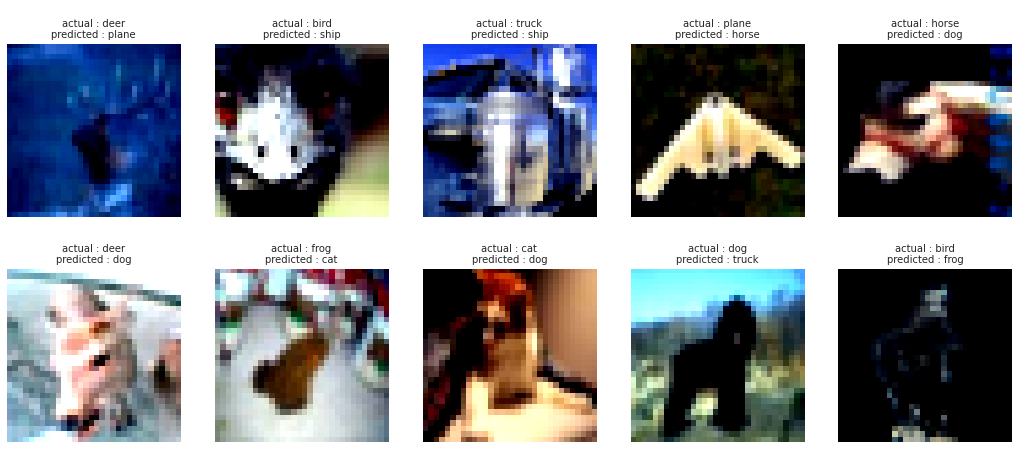

============================================== Grdadcam Misclassified Images =============================================================================
torch.Size([20, 10])
Generating Grad-CAM @ReLU()


ValueError: ignored

In [ ]:
model_main.run_experiments_custom_resnet(start_lr = start_lr, 
                                         lrmax = max_lr,
                                         IsSGD= False)

In [ ]:
start_lr = 1e-3
# max_lr = 0.0172685370741483 (Working with 87%)
max_lr = 0.022272685370741483  # 0.009746555323590814

Got all parser argument
================================================> Preparing data................
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
===========================================================> Building model Custom resnet.=========================================..............
CustomResNet(
  (prep_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), 

Loss=1.2268283367156982 Batch_id=97  LR=0.00111 Accuracy=42.10: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]
Loss=1.2722324132919312 Batch_id=19 LR=0.00111 Accuracy=56.14: 100%|██████████| 20/20 [00:04<00:00,  4.66it/s]


Adjusting learning rate of group 0 to 1.1139e-03.

Epoch: 1


Loss=0.8604394197463989 Batch_id=97  LR=0.00111 Accuracy=62.44: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]
Loss=0.8895882368087769 Batch_id=19 LR=0.00111 Accuracy=68.87: 100%|██████████| 20/20 [00:04<00:00,  4.66it/s]


Adjusting learning rate of group 0 to 1.1145e-03.

Epoch: 2


Loss=0.8000339269638062 Batch_id=97  LR=0.00111 Accuracy=71.98: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]
Loss=0.7474511861801147 Batch_id=19 LR=0.00111 Accuracy=77.12: 100%|██████████| 20/20 [00:04<00:00,  4.63it/s]


Adjusting learning rate of group 0 to 1.1156e-03.

Epoch: 3


Loss=0.5908682346343994 Batch_id=97  LR=0.00112 Accuracy=76.72: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]
Loss=0.6271023750305176 Batch_id=19 LR=0.00112 Accuracy=78.99: 100%|██████████| 20/20 [00:04<00:00,  4.61it/s]


Adjusting learning rate of group 0 to 1.1171e-03.

Epoch: 4


Loss=0.6451232433319092 Batch_id=97  LR=0.00112 Accuracy=79.19: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]
Loss=0.5317234992980957 Batch_id=19 LR=0.00112 Accuracy=82.68: 100%|██████████| 20/20 [00:04<00:00,  4.63it/s]


Adjusting learning rate of group 0 to 1.1191e-03.

Epoch: 5


Loss=0.5496397018432617 Batch_id=97  LR=0.00112 Accuracy=80.97: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]
Loss=0.5522008538246155 Batch_id=19 LR=0.00112 Accuracy=83.85: 100%|██████████| 20/20 [00:04<00:00,  4.65it/s]


Adjusting learning rate of group 0 to 1.1215e-03.

Epoch: 6


Loss=0.47150012850761414 Batch_id=97  LR=0.00112 Accuracy=81.82: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.5719302296638489 Batch_id=19 LR=0.00112 Accuracy=82.15: 100%|██████████| 20/20 [00:04<00:00,  4.60it/s]


Adjusting learning rate of group 0 to 1.1243e-03.

Epoch: 7


Loss=0.48742830753326416 Batch_id=97  LR=0.00112 Accuracy=83.23: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.4627211093902588 Batch_id=19 LR=0.00112 Accuracy=84.59: 100%|██████████| 20/20 [00:04<00:00,  4.62it/s]


Adjusting learning rate of group 0 to 1.1276e-03.

Epoch: 8


Loss=0.4601840376853943 Batch_id=97  LR=0.00113 Accuracy=84.06: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.5466702580451965 Batch_id=19 LR=0.00113 Accuracy=83.59: 100%|██████████| 20/20 [00:04<00:00,  4.60it/s]


Adjusting learning rate of group 0 to 1.1313e-03.

Epoch: 9


Loss=0.4390779137611389 Batch_id=97  LR=0.00113 Accuracy=84.71: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.522991955280304 Batch_id=19 LR=0.00113 Accuracy=84.88: 100%|██████████| 20/20 [00:04<00:00,  4.59it/s]


Adjusting learning rate of group 0 to 1.1355e-03.

Epoch: 10


Loss=0.42307931184768677 Batch_id=97  LR=0.00114 Accuracy=85.21: 100%|██████████| 98/98 [00:58<00:00,  1.69it/s]
Loss=0.44311562180519104 Batch_id=19 LR=0.00114 Accuracy=86.76: 100%|██████████| 20/20 [00:04<00:00,  4.60it/s]


Adjusting learning rate of group 0 to 1.1400e-03.

Epoch: 11


Loss=0.3882578909397125 Batch_id=97  LR=0.00114 Accuracy=85.45: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.41855329275131226 Batch_id=19 LR=0.00114 Accuracy=87.35: 100%|██████████| 20/20 [00:04<00:00,  4.58it/s]


Adjusting learning rate of group 0 to 1.1451e-03.

Epoch: 12


Loss=0.3896304666996002 Batch_id=97  LR=0.00115 Accuracy=86.08: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.37676581740379333 Batch_id=19 LR=0.00115 Accuracy=87.21: 100%|██████████| 20/20 [00:04<00:00,  4.59it/s]


Adjusting learning rate of group 0 to 1.1505e-03.

Epoch: 13


Loss=0.36159223318099976 Batch_id=97  LR=0.00115 Accuracy=86.41: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.4494970440864563 Batch_id=19 LR=0.00115 Accuracy=86.85: 100%|██████████| 20/20 [00:04<00:00,  4.62it/s]


Adjusting learning rate of group 0 to 1.1564e-03.

Epoch: 14


Loss=0.5109360814094543 Batch_id=97  LR=0.00116 Accuracy=86.59: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.43191012740135193 Batch_id=19 LR=0.00116 Accuracy=86.91: 100%|██████████| 20/20 [00:04<00:00,  4.66it/s]


Adjusting learning rate of group 0 to 1.1627e-03.

Epoch: 15


Loss=0.31840959191322327 Batch_id=97  LR=0.00116 Accuracy=87.18: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.4378634989261627 Batch_id=19 LR=0.00116 Accuracy=88.11: 100%|██████████| 20/20 [00:04<00:00,  4.60it/s]


Adjusting learning rate of group 0 to 1.1695e-03.

Epoch: 16


Loss=0.40223270654678345 Batch_id=97  LR=0.00117 Accuracy=87.35: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.42139744758605957 Batch_id=19 LR=0.00117 Accuracy=87.61: 100%|██████████| 20/20 [00:04<00:00,  4.58it/s]


Adjusting learning rate of group 0 to 1.1767e-03.

Epoch: 17


Loss=0.3143328130245209 Batch_id=97  LR=0.00118 Accuracy=87.60: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.42976799607276917 Batch_id=19 LR=0.00118 Accuracy=87.86: 100%|██████████| 20/20 [00:04<00:00,  4.64it/s]


Adjusting learning rate of group 0 to 1.1843e-03.

Epoch: 18


Loss=0.3879280090332031 Batch_id=97  LR=0.00118 Accuracy=88.02: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.3581315875053406 Batch_id=19 LR=0.00118 Accuracy=89.11: 100%|██████████| 20/20 [00:04<00:00,  4.60it/s]


Adjusting learning rate of group 0 to 1.1924e-03.

Epoch: 19


Loss=0.4359463155269623 Batch_id=97  LR=0.00119 Accuracy=87.90: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.4559147357940674 Batch_id=19 LR=0.00119 Accuracy=88.23: 100%|██████████| 20/20 [00:04<00:00,  4.61it/s]


Adjusting learning rate of group 0 to 1.2008e-03.

Epoch: 20


Loss=0.3709011673927307 Batch_id=97  LR=0.00120 Accuracy=88.45: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.4197840988636017 Batch_id=19 LR=0.00120 Accuracy=88.06: 100%|██████████| 20/20 [00:04<00:00,  4.59it/s]


Adjusting learning rate of group 0 to 1.2098e-03.

Epoch: 21


Loss=0.34115320444107056 Batch_id=97  LR=0.00121 Accuracy=88.32: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.3472164571285248 Batch_id=19 LR=0.00121 Accuracy=88.71: 100%|██████████| 20/20 [00:04<00:00,  4.62it/s]


Adjusting learning rate of group 0 to 1.2191e-03.

Epoch: 22


Loss=0.4081433117389679 Batch_id=97  LR=0.00122 Accuracy=88.65: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
Loss=0.3707403838634491 Batch_id=19 LR=0.00122 Accuracy=88.48: 100%|██████████| 20/20 [00:04<00:00,  4.65it/s]


Adjusting learning rate of group 0 to 1.2289e-03.

Epoch: 23


Loss=0.2803793251514435 Batch_id=97  LR=0.00123 Accuracy=88.50: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]
Loss=0.36180248856544495 Batch_id=19 LR=0.00123 Accuracy=88.32: 100%|██████████| 20/20 [00:04<00:00,  4.62it/s]


Adjusting learning rate of group 0 to 1.2391e-03.
============================================================ Training and Testing Performance ==============================================================


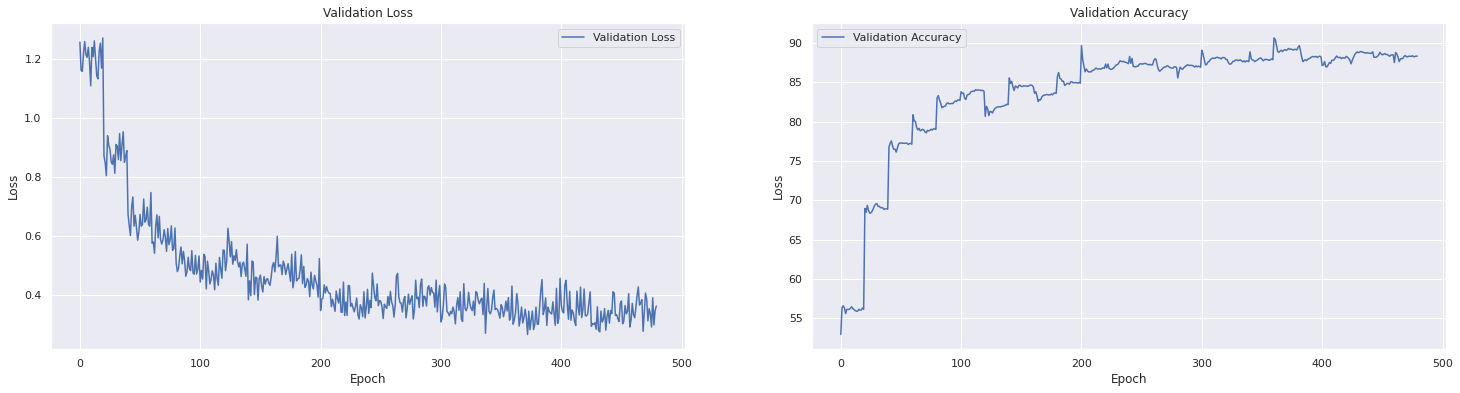

============================================================= Class Level Accuracy =========================================================================
Accuracy of airplane : 85 %
Accuracy of automobile : 100 %
Accuracy of  bird : 92 %
Accuracy of   cat : 58 %
Accuracy of  deer : 100 %
Accuracy of   dog : 66 %
Accuracy of  frog : 90 %
Accuracy of horse : 83 %
Accuracy of  ship : 95 %
Accuracy of truck : 100 %
============================================== Random Misclassified Images ================================================================================


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 1168


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


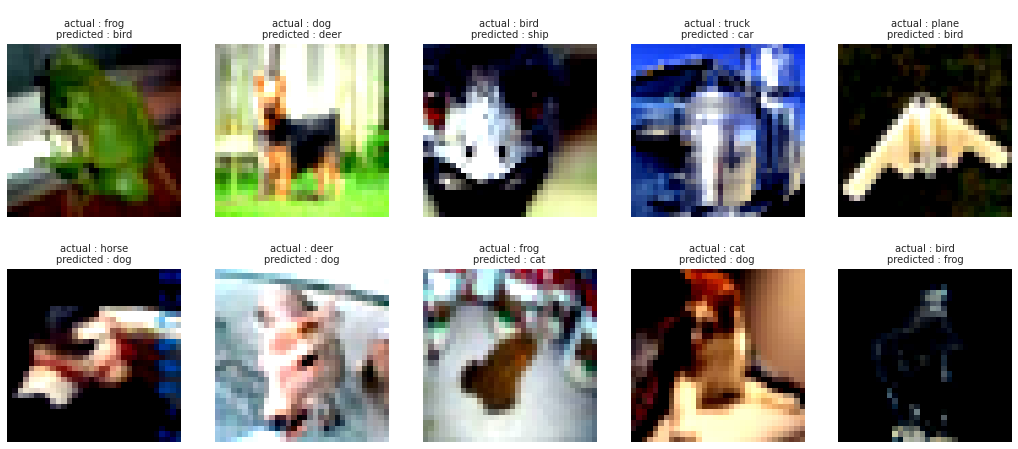

============================================== Grdadcam Misclassified Images =============================================================================
torch.Size([20, 10])
Generating Grad-CAM @ReLU()


ValueError: ignored

In [ ]:
model_main.run_experiments_custom_resnet(start_lr = start_lr, 
                                         lrmax = max_lr,
                                         IsSGD= False)

In [ ]:
start_lr = 1e-3
# max_lr = 0.0172685370741483 (Working with 87%)
max_lr = 0.016272685370741483  # 0.009746555323590814

Got all parser argument
================================================> Preparing data................


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
===========================================================> Building model Custom resnet.=========================================..............
CustomResNet(
  (prep_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True

Loss=1.251511812210083 Batch_id=97  LR=0.00054 Accuracy=42.66: 100%|██████████| 98/98 [00:52<00:00,  1.88it/s]
Loss=1.3866994380950928 Batch_id=19 LR=0.00054 Accuracy=53.87: 100%|██████████| 20/20 [00:03<00:00,  5.03it/s]


Saving..
Adjusting learning rate of group 0 to 5.4259e-04.

Epoch: 1


Loss=0.8501661419868469 Batch_id=97  LR=0.00054 Accuracy=62.43: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.8629393577575684 Batch_id=19 LR=0.00054 Accuracy=71.81: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


Saving..
Adjusting learning rate of group 0 to 5.4307e-04.

Epoch: 2


Loss=0.7900760173797607 Batch_id=97  LR=0.00054 Accuracy=72.65: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.8612848520278931 Batch_id=19 LR=0.00054 Accuracy=73.58: 100%|██████████| 20/20 [00:03<00:00,  5.03it/s]


Saving..
Adjusting learning rate of group 0 to 5.4388e-04.

Epoch: 3


Loss=0.6459170579910278 Batch_id=97  LR=0.00054 Accuracy=77.43: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.6095558404922485 Batch_id=19 LR=0.00054 Accuracy=80.57: 100%|██████████| 20/20 [00:03<00:00,  5.03it/s]


Saving..
Adjusting learning rate of group 0 to 5.4502e-04.

Epoch: 4


Loss=0.48732706904411316 Batch_id=97  LR=0.00055 Accuracy=80.94: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.5495596528053284 Batch_id=19 LR=0.00055 Accuracy=82.84: 100%|██████████| 20/20 [00:03<00:00,  5.03it/s]


Saving..
Adjusting learning rate of group 0 to 5.4648e-04.

Epoch: 5


Loss=0.39573824405670166 Batch_id=97  LR=0.00055 Accuracy=82.86: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.5575389266014099 Batch_id=19 LR=0.00055 Accuracy=83.34: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


Saving..
Adjusting learning rate of group 0 to 5.4827e-04.

Epoch: 6


Loss=0.4275619089603424 Batch_id=97  LR=0.00055 Accuracy=84.27: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.4872133135795593 Batch_id=19 LR=0.00055 Accuracy=84.91: 100%|██████████| 20/20 [00:03<00:00,  5.01it/s]


Saving..
Adjusting learning rate of group 0 to 5.5037e-04.

Epoch: 7


Loss=0.4648057520389557 Batch_id=97  LR=0.00055 Accuracy=85.42: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.428703635931015 Batch_id=19 LR=0.00055 Accuracy=86.01: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


Saving..
Adjusting learning rate of group 0 to 5.5281e-04.

Epoch: 8


Loss=0.441622793674469 Batch_id=97  LR=0.00055 Accuracy=86.50: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.3906804919242859 Batch_id=19 LR=0.00055 Accuracy=86.47: 100%|██████████| 20/20 [00:03<00:00,  5.02it/s]


Saving..
Adjusting learning rate of group 0 to 5.5557e-04.

Epoch: 9


Loss=0.3884592652320862 Batch_id=97  LR=0.00056 Accuracy=87.32: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.41124090552330017 Batch_id=19 LR=0.00056 Accuracy=87.11: 100%|██████████| 20/20 [00:03<00:00,  5.00it/s]


Saving..
Adjusting learning rate of group 0 to 5.5865e-04.

Epoch: 10


Loss=0.33752578496932983 Batch_id=97  LR=0.00056 Accuracy=87.86: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.4414394199848175 Batch_id=19 LR=0.00056 Accuracy=87.55: 100%|██████████| 20/20 [00:04<00:00,  5.00it/s]


Saving..
Adjusting learning rate of group 0 to 5.6205e-04.

Epoch: 11


Loss=0.41085106134414673 Batch_id=97  LR=0.00056 Accuracy=88.68: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.4824024736881256 Batch_id=19 LR=0.00056 Accuracy=86.47: 100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


Adjusting learning rate of group 0 to 5.6578e-04.

Epoch: 12


Loss=0.3415544927120209 Batch_id=97  LR=0.00057 Accuracy=89.24: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.32288864254951477 Batch_id=19 LR=0.00057 Accuracy=88.22: 100%|██████████| 20/20 [00:04<00:00,  4.94it/s]


Saving..
Adjusting learning rate of group 0 to 5.6984e-04.

Epoch: 13


Loss=0.34932875633239746 Batch_id=97  LR=0.00057 Accuracy=89.30: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.37472212314605713 Batch_id=19 LR=0.00057 Accuracy=87.85: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


Adjusting learning rate of group 0 to 5.7422e-04.

Epoch: 14


Loss=0.35204607248306274 Batch_id=97  LR=0.00057 Accuracy=89.70: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3146742582321167 Batch_id=19 LR=0.00057 Accuracy=87.63: 100%|██████████| 20/20 [00:04<00:00,  4.97it/s]


Adjusting learning rate of group 0 to 5.7892e-04.

Epoch: 15


Loss=0.23373004794120789 Batch_id=97  LR=0.00058 Accuracy=90.18: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.36095452308654785 Batch_id=19 LR=0.00058 Accuracy=88.26: 100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


Saving..
Adjusting learning rate of group 0 to 5.8394e-04.

Epoch: 16


Loss=0.32003021240234375 Batch_id=97  LR=0.00058 Accuracy=90.57: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3783276677131653 Batch_id=19 LR=0.00058 Accuracy=87.79: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


Adjusting learning rate of group 0 to 5.8929e-04.

Epoch: 17


Loss=0.25209173560142517 Batch_id=97  LR=0.00059 Accuracy=90.71: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.33875951170921326 Batch_id=19 LR=0.00059 Accuracy=88.62: 100%|██████████| 20/20 [00:04<00:00,  4.93it/s]


Saving..
Adjusting learning rate of group 0 to 5.9495e-04.

Epoch: 18


Loss=0.25725793838500977 Batch_id=97  LR=0.00059 Accuracy=90.98: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.40088093280792236 Batch_id=19 LR=0.00059 Accuracy=88.91: 100%|██████████| 20/20 [00:04<00:00,  4.97it/s]


Saving..
Adjusting learning rate of group 0 to 6.0095e-04.

Epoch: 19


Loss=0.25016701221466064 Batch_id=97  LR=0.00060 Accuracy=91.03: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.286194384098053 Batch_id=19 LR=0.00060 Accuracy=88.83: 100%|██████████| 20/20 [00:04<00:00,  4.85it/s]


Adjusting learning rate of group 0 to 6.0726e-04.

Epoch: 20


Loss=0.26553598046302795 Batch_id=97  LR=0.00061 Accuracy=91.53: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3727118670940399 Batch_id=19 LR=0.00061 Accuracy=88.00: 100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


Adjusting learning rate of group 0 to 6.1390e-04.

Epoch: 21


Loss=0.2325044572353363 Batch_id=97  LR=0.00061 Accuracy=91.57: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.41854026913642883 Batch_id=19 LR=0.00061 Accuracy=88.68: 100%|██████████| 20/20 [00:04<00:00,  4.95it/s]


Adjusting learning rate of group 0 to 6.2085e-04.

Epoch: 22


Loss=0.300189733505249 Batch_id=97  LR=0.00062 Accuracy=91.49: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3287305533885956 Batch_id=19 LR=0.00062 Accuracy=89.20: 100%|██████████| 20/20 [00:04<00:00,  5.00it/s]


Saving..
Adjusting learning rate of group 0 to 6.2813e-04.

Epoch: 23


Loss=0.2429591417312622 Batch_id=97  LR=0.00063 Accuracy=91.90: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3671928942203522 Batch_id=19 LR=0.00063 Accuracy=88.86: 100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


Adjusting learning rate of group 0 to 6.3573e-04.
============================================================ Training and Testing Performance ==============================================================


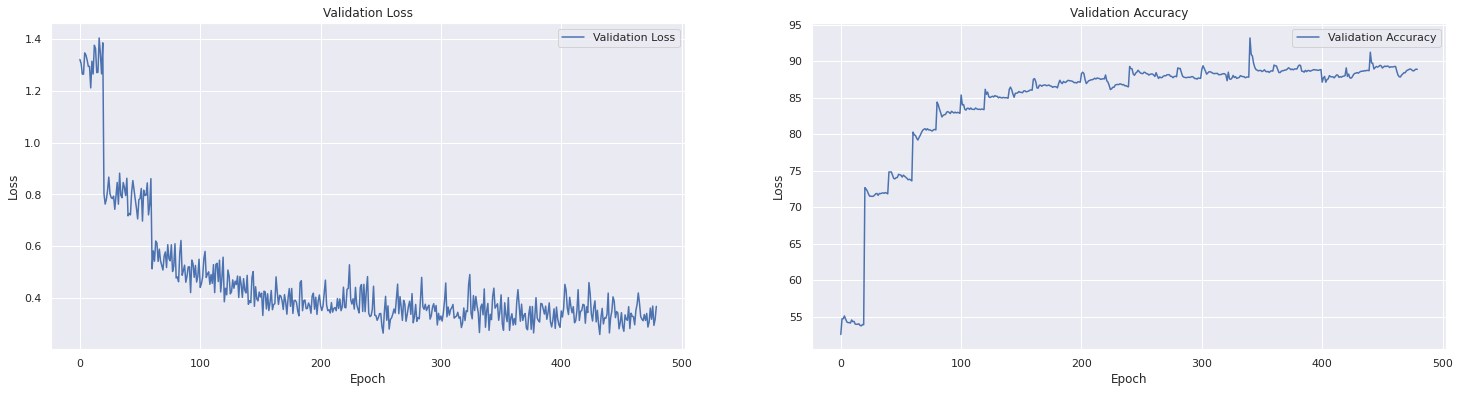

============================================================= Class Level Accuracy =========================================================================
Accuracy of airplane : 71 %
Accuracy of automobile : 100 %
Accuracy of  bird : 85 %
Accuracy of   cat : 75 %
Accuracy of  deer : 85 %
Accuracy of   dog : 66 %
Accuracy of  frog : 72 %
Accuracy of horse : 100 %
Accuracy of  ship : 91 %
Accuracy of truck : 100 %
============================================== Random Misclassified Images ================================================================================


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 1114


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


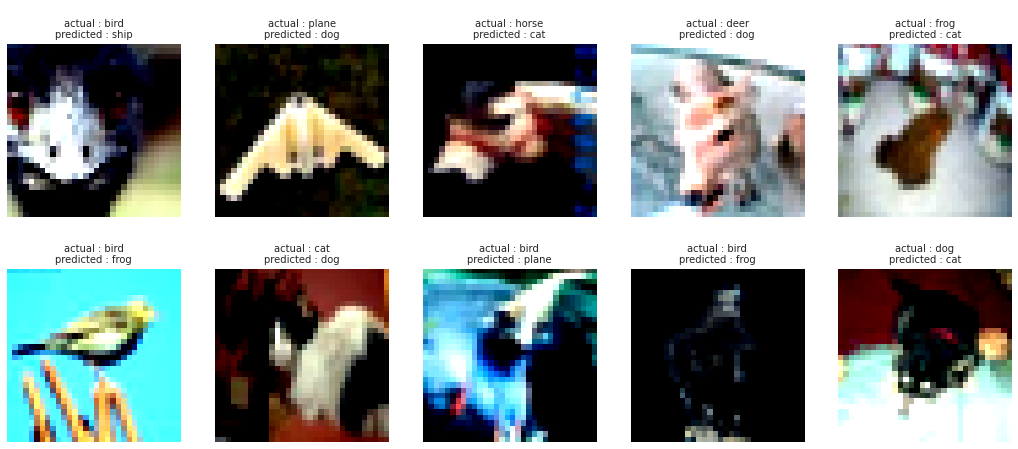

============================================== Grdadcam Misclassified Images =============================================================================
torch.Size([20, 10])
Generating Grad-CAM @ReLU()


ValueError: ignored

In [ ]:
model_main.run_experiments_custom_resnet(start_lr = start_lr, 
                                         lrmax = max_lr,
                                         IsSGD= False)

### Custom ResNet with 1FC - max-holes =4

In [ ]:
start_lr = 1e-2
# max_lr = 0.0172685370741483 (Working with 87%)
max_lr = 0.012272685370741483  # 0.009746555323590814

Got all parser argument
================================================> Preparing data................


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
===========================================================> Building model Custom resnet.=========================================..............
CustomResNetFC(
  (prep_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=Tr

Loss=1.0803403854370117 Batch_id=97  LR=0.00041 Accuracy=49.71: 100%|██████████| 98/98 [00:55<00:00,  1.76it/s]
Loss=1.0810426473617554 Batch_id=19 LR=0.00041 Accuracy=64.58: 100%|██████████| 20/20 [00:04<00:00,  4.71it/s]


Saving..
Adjusting learning rate of group 0 to 4.0921e-04.

Epoch: 1


Loss=0.7775525450706482 Batch_id=97  LR=0.00041 Accuracy=67.29: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.8585231304168701 Batch_id=19 LR=0.00041 Accuracy=72.28: 100%|██████████| 20/20 [00:04<00:00,  4.73it/s]


Saving..
Adjusting learning rate of group 0 to 4.0958e-04.

Epoch: 2


Loss=0.6850263476371765 Batch_id=97  LR=0.00041 Accuracy=74.38: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.6371126770973206 Batch_id=19 LR=0.00041 Accuracy=79.15: 100%|██████████| 20/20 [00:04<00:00,  4.75it/s]


Saving..
Adjusting learning rate of group 0 to 4.1019e-04.

Epoch: 3


Loss=0.5888514518737793 Batch_id=97  LR=0.00041 Accuracy=78.34: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.5551239848136902 Batch_id=19 LR=0.00041 Accuracy=80.95: 100%|██████████| 20/20 [00:04<00:00,  4.68it/s]


Saving..
Adjusting learning rate of group 0 to 4.1105e-04.

Epoch: 4


Loss=0.4801810085773468 Batch_id=97  LR=0.00041 Accuracy=81.16: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.5410103797912598 Batch_id=19 LR=0.00041 Accuracy=83.01: 100%|██████████| 20/20 [00:04<00:00,  4.66it/s]


Saving..
Adjusting learning rate of group 0 to 4.1215e-04.

Epoch: 5


Loss=0.43204429745674133 Batch_id=97  LR=0.00041 Accuracy=83.67: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]
Loss=0.538736879825592 Batch_id=19 LR=0.00041 Accuracy=83.07: 100%|██████████| 20/20 [00:04<00:00,  4.69it/s]


Saving..
Adjusting learning rate of group 0 to 4.1350e-04.

Epoch: 6


Loss=0.4181007146835327 Batch_id=97  LR=0.00041 Accuracy=84.74: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]
Loss=0.49707362055778503 Batch_id=19 LR=0.00041 Accuracy=84.56: 100%|██████████| 20/20 [00:04<00:00,  4.76it/s]


Saving..
Adjusting learning rate of group 0 to 4.1509e-04.

Epoch: 7


Loss=0.39439165592193604 Batch_id=97  LR=0.00042 Accuracy=86.33: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.4083193838596344 Batch_id=19 LR=0.00042 Accuracy=86.07: 100%|██████████| 20/20 [00:04<00:00,  4.69it/s]


Saving..
Adjusting learning rate of group 0 to 4.1692e-04.

Epoch: 8


Loss=0.38191524147987366 Batch_id=97  LR=0.00042 Accuracy=87.53: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.40128716826438904 Batch_id=19 LR=0.00042 Accuracy=87.14: 100%|██████████| 20/20 [00:04<00:00,  4.72it/s]


Saving..
Adjusting learning rate of group 0 to 4.1900e-04.

Epoch: 9


Loss=0.38346654176712036 Batch_id=97  LR=0.00042 Accuracy=88.47: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.45388856530189514 Batch_id=19 LR=0.00042 Accuracy=86.59: 100%|██████████| 20/20 [00:04<00:00,  4.72it/s]


Adjusting learning rate of group 0 to 4.2133e-04.

Epoch: 10


Loss=0.3062099814414978 Batch_id=97  LR=0.00042 Accuracy=88.98: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.41443750262260437 Batch_id=19 LR=0.00042 Accuracy=88.01: 100%|██████████| 20/20 [00:04<00:00,  4.55it/s]


Saving..
Adjusting learning rate of group 0 to 4.2390e-04.

Epoch: 11


Loss=0.3424527645111084 Batch_id=97  LR=0.00042 Accuracy=89.81: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.43647605180740356 Batch_id=19 LR=0.00042 Accuracy=86.96: 100%|██████████| 20/20 [00:04<00:00,  4.67it/s]


Adjusting learning rate of group 0 to 4.2671e-04.

Epoch: 12


Loss=0.3151156008243561 Batch_id=97  LR=0.00043 Accuracy=90.23: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.35919201374053955 Batch_id=19 LR=0.00043 Accuracy=87.69: 100%|██████████| 20/20 [00:04<00:00,  4.70it/s]


Adjusting learning rate of group 0 to 4.2977e-04.

Epoch: 13


Loss=0.24342291057109833 Batch_id=97  LR=0.00043 Accuracy=90.59: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.35529354214668274 Batch_id=19 LR=0.00043 Accuracy=89.00: 100%|██████████| 20/20 [00:04<00:00,  4.69it/s]


Saving..
Adjusting learning rate of group 0 to 4.3307e-04.

Epoch: 14


Loss=0.18141870200634003 Batch_id=97  LR=0.00043 Accuracy=91.18: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.34475716948509216 Batch_id=19 LR=0.00043 Accuracy=88.78: 100%|██████████| 20/20 [00:04<00:00,  4.70it/s]


Adjusting learning rate of group 0 to 4.3661e-04.

Epoch: 15


Loss=0.2960931658744812 Batch_id=97  LR=0.00044 Accuracy=91.77: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.330055296421051 Batch_id=19 LR=0.00044 Accuracy=89.41: 100%|██████████| 20/20 [00:04<00:00,  4.66it/s]


Saving..
Adjusting learning rate of group 0 to 4.4040e-04.

Epoch: 16


Loss=0.1932329684495926 Batch_id=97  LR=0.00044 Accuracy=92.05: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.28563109040260315 Batch_id=19 LR=0.00044 Accuracy=89.11: 100%|██████████| 20/20 [00:04<00:00,  4.70it/s]


Adjusting learning rate of group 0 to 4.4443e-04.

Epoch: 17


Loss=0.23187978565692902 Batch_id=97  LR=0.00044 Accuracy=92.20: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]
Loss=0.3159399628639221 Batch_id=19 LR=0.00044 Accuracy=89.23: 100%|██████████| 20/20 [00:04<00:00,  4.70it/s]


Adjusting learning rate of group 0 to 4.4871e-04.

Epoch: 18


Loss=0.23261263966560364 Batch_id=97  LR=0.00045 Accuracy=92.51: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.2882962226867676 Batch_id=19 LR=0.00045 Accuracy=89.68: 100%|██████████| 20/20 [00:04<00:00,  4.66it/s]


Saving..
Adjusting learning rate of group 0 to 4.5323e-04.

Epoch: 19


Loss=0.21216484904289246 Batch_id=97  LR=0.00045 Accuracy=92.88: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.27929970622062683 Batch_id=19 LR=0.00045 Accuracy=89.60: 100%|██████████| 20/20 [00:04<00:00,  4.68it/s]


Adjusting learning rate of group 0 to 4.5799e-04.

Epoch: 20


Loss=0.2843264043331146 Batch_id=97  LR=0.00046 Accuracy=92.87: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.3100922107696533 Batch_id=19 LR=0.00046 Accuracy=89.38: 100%|██████████| 20/20 [00:04<00:00,  4.70it/s]


Adjusting learning rate of group 0 to 4.6299e-04.

Epoch: 21


Loss=0.19469763338565826 Batch_id=97  LR=0.00046 Accuracy=92.92: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]
Loss=0.26332759857177734 Batch_id=19 LR=0.00046 Accuracy=89.70: 100%|██████████| 20/20 [00:04<00:00,  4.69it/s]


Saving..
Adjusting learning rate of group 0 to 4.6824e-04.

Epoch: 22


Loss=0.20424754917621613 Batch_id=97  LR=0.00047 Accuracy=93.42: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]
Loss=0.28830063343048096 Batch_id=19 LR=0.00047 Accuracy=90.06: 100%|██████████| 20/20 [00:04<00:00,  4.64it/s]


Saving..
Adjusting learning rate of group 0 to 4.7373e-04.

Epoch: 23


Loss=0.24067692458629608 Batch_id=97  LR=0.00047 Accuracy=93.66: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]
Loss=0.3006252944469452 Batch_id=19 LR=0.00047 Accuracy=90.14: 100%|██████████| 20/20 [00:04<00:00,  4.75it/s]


Saving..
Adjusting learning rate of group 0 to 4.7946e-04.
============================================================ Training and Testing Performance ==============================================================


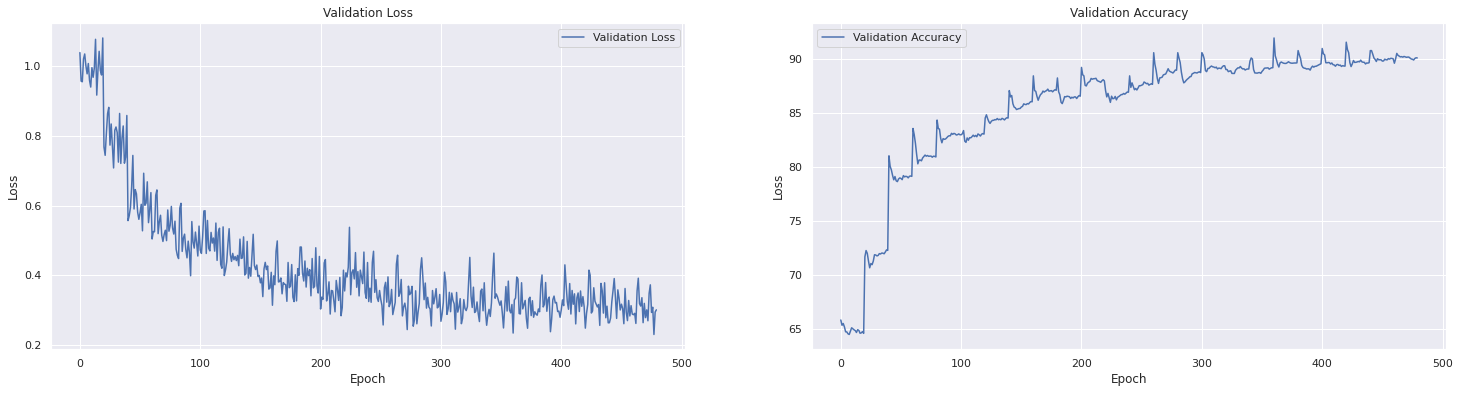

============================================================= Class Level Accuracy =========================================================================
Accuracy of airplane : 85 %
Accuracy of automobile : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 50 %
Accuracy of  deer : 100 %
Accuracy of   dog : 66 %
Accuracy of  frog : 100 %
Accuracy of horse : 83 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %
============================================== Random Misclassified Images ================================================================================


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 986


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


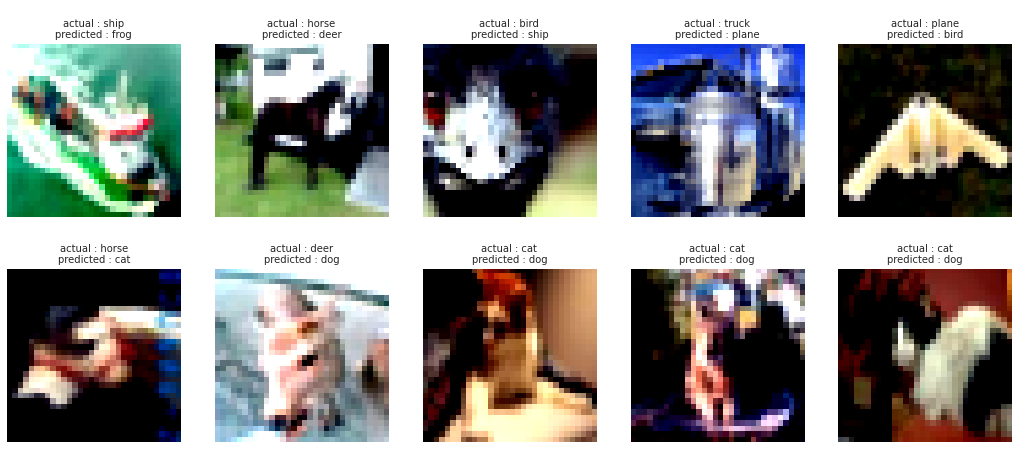

============================================== Grdadcam Misclassified Images =============================================================================
torch.Size([20, 10])
Generating Grad-CAM @Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


ValueError: ignored

In [ ]:
model_main.run_experiments_custom_resnet_fc(start_lr = start_lr, 
                                         lrmax = max_lr,
                                         IsSGD= False)

### Custom ResNet with 1FC - max-holes = 5

In [20]:
start_lr = 1e-2
# max_lr = 0.0172685370741483 (Working with 87%)
max_lr = 0.012272685370741483  # 0.009746555323590814

In [10]:
my_model = model_main.get_model()

CustomResNetFC(
  (prep_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (dp1): Dropout2d(p=0.0005, inplac

Got all parser argument
================================================> Preparing data................
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
===========================================================> Building model Custom resnet.=========================================..............
CustomResNetFC(
  (prep_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1)

Loss=0.9995399713516235 Batch_id=97  LR=0.00041 Accuracy=51.51: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=1.110113263130188 Batch_id=19 LR=0.00041 Accuracy=64.22: 100%|██████████| 20/20 [00:04<00:00,  4.77it/s]


Adjusting learning rate of group 0 to 4.0921e-04.

Epoch: 1


Loss=0.8514081239700317 Batch_id=97  LR=0.00041 Accuracy=68.31: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.8774008750915527 Batch_id=19 LR=0.00041 Accuracy=71.85: 100%|██████████| 20/20 [00:04<00:00,  4.88it/s]


Adjusting learning rate of group 0 to 4.0958e-04.

Epoch: 2


Loss=0.5337222814559937 Batch_id=97  LR=0.00041 Accuracy=74.96: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.6929785013198853 Batch_id=19 LR=0.00041 Accuracy=77.90: 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]


Adjusting learning rate of group 0 to 4.1019e-04.

Epoch: 3


Loss=0.5200719237327576 Batch_id=97  LR=0.00041 Accuracy=79.22: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.5600142478942871 Batch_id=19 LR=0.00041 Accuracy=82.07: 100%|██████████| 20/20 [00:04<00:00,  4.92it/s]


Adjusting learning rate of group 0 to 4.1105e-04.

Epoch: 4


Loss=0.4507559835910797 Batch_id=97  LR=0.00041 Accuracy=82.19: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.6069102883338928 Batch_id=19 LR=0.00041 Accuracy=82.74: 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]


Adjusting learning rate of group 0 to 4.1215e-04.

Epoch: 5


Loss=0.44767406582832336 Batch_id=97  LR=0.00041 Accuracy=84.13: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.48224982619285583 Batch_id=19 LR=0.00041 Accuracy=84.27: 100%|██████████| 20/20 [00:04<00:00,  4.91it/s]


Adjusting learning rate of group 0 to 4.1350e-04.

Epoch: 6


Loss=0.462967187166214 Batch_id=97  LR=0.00041 Accuracy=85.87: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.5015749931335449 Batch_id=19 LR=0.00041 Accuracy=84.39: 100%|██████████| 20/20 [00:04<00:00,  4.88it/s]


Adjusting learning rate of group 0 to 4.1509e-04.

Epoch: 7


Loss=0.3469301760196686 Batch_id=97  LR=0.00042 Accuracy=86.96: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.5198085904121399 Batch_id=19 LR=0.00042 Accuracy=85.92: 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]


Adjusting learning rate of group 0 to 4.1692e-04.

Epoch: 8


Loss=0.380158931016922 Batch_id=97  LR=0.00042 Accuracy=88.13: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.5024737119674683 Batch_id=19 LR=0.00042 Accuracy=86.24: 100%|██████████| 20/20 [00:04<00:00,  4.87it/s]


Adjusting learning rate of group 0 to 4.1900e-04.

Epoch: 9


Loss=0.3330478072166443 Batch_id=97  LR=0.00042 Accuracy=89.18: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.4402120113372803 Batch_id=19 LR=0.00042 Accuracy=87.47: 100%|██████████| 20/20 [00:04<00:00,  4.86it/s]


Adjusting learning rate of group 0 to 4.2133e-04.

Epoch: 10


Loss=0.2995927035808563 Batch_id=97  LR=0.00042 Accuracy=89.60: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.4543359875679016 Batch_id=19 LR=0.00042 Accuracy=86.87: 100%|██████████| 20/20 [00:04<00:00,  4.86it/s]


Adjusting learning rate of group 0 to 4.2390e-04.

Epoch: 11


Loss=0.28758493065834045 Batch_id=97  LR=0.00042 Accuracy=90.47: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.4091968536376953 Batch_id=19 LR=0.00042 Accuracy=87.92: 100%|██████████| 20/20 [00:04<00:00,  4.86it/s]


Adjusting learning rate of group 0 to 4.2671e-04.

Epoch: 12


Loss=0.23946750164031982 Batch_id=97  LR=0.00043 Accuracy=91.13: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.40983816981315613 Batch_id=19 LR=0.00043 Accuracy=87.67: 100%|██████████| 20/20 [00:04<00:00,  4.83it/s]


Adjusting learning rate of group 0 to 4.2977e-04.

Epoch: 13


Loss=0.3030290901660919 Batch_id=97  LR=0.00043 Accuracy=91.76: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3653704524040222 Batch_id=19 LR=0.00043 Accuracy=88.51: 100%|██████████| 20/20 [00:04<00:00,  4.86it/s]


Adjusting learning rate of group 0 to 4.3307e-04.

Epoch: 14


Loss=0.2571757435798645 Batch_id=97  LR=0.00043 Accuracy=92.01: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3948836922645569 Batch_id=19 LR=0.00043 Accuracy=88.95: 100%|██████████| 20/20 [00:04<00:00,  4.87it/s]


Adjusting learning rate of group 0 to 4.3661e-04.

Epoch: 15


Loss=0.25818687677383423 Batch_id=97  LR=0.00044 Accuracy=92.11: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3483911454677582 Batch_id=19 LR=0.00044 Accuracy=86.42: 100%|██████████| 20/20 [00:04<00:00,  4.88it/s]


Adjusting learning rate of group 0 to 4.4040e-04.

Epoch: 16


Loss=0.18621507287025452 Batch_id=97  LR=0.00044 Accuracy=92.81: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3430015742778778 Batch_id=19 LR=0.00044 Accuracy=88.46: 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]


Adjusting learning rate of group 0 to 4.4443e-04.

Epoch: 17


Loss=0.2361317127943039 Batch_id=97  LR=0.00044 Accuracy=92.92: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3916541635990143 Batch_id=19 LR=0.00044 Accuracy=88.83: 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]


Adjusting learning rate of group 0 to 4.4871e-04.

Epoch: 18


Loss=0.19433902204036713 Batch_id=97  LR=0.00045 Accuracy=93.27: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.36774423718452454 Batch_id=19 LR=0.00045 Accuracy=88.25: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


Adjusting learning rate of group 0 to 4.5323e-04.

Epoch: 19


Loss=0.22390447556972504 Batch_id=97  LR=0.00045 Accuracy=93.09: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.3535363972187042 Batch_id=19 LR=0.00045 Accuracy=89.39: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


Adjusting learning rate of group 0 to 4.5799e-04.

Epoch: 20


Loss=0.2509613037109375 Batch_id=97  LR=0.00046 Accuracy=93.58: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3630237281322479 Batch_id=19 LR=0.00046 Accuracy=89.70: 100%|██████████| 20/20 [00:04<00:00,  4.84it/s]


Adjusting learning rate of group 0 to 4.6299e-04.

Epoch: 21


Loss=0.21814033389091492 Batch_id=97  LR=0.00046 Accuracy=93.82: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
Loss=0.3096250295639038 Batch_id=19 LR=0.00046 Accuracy=90.06: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


Saving..
Adjusting learning rate of group 0 to 4.6824e-04.

Epoch: 22


Loss=0.2397819459438324 Batch_id=97  LR=0.00047 Accuracy=93.84: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.3718926012516022 Batch_id=19 LR=0.00047 Accuracy=88.85: 100%|██████████| 20/20 [00:04<00:00,  4.86it/s]


Adjusting learning rate of group 0 to 4.7373e-04.

Epoch: 23


Loss=0.19741526246070862 Batch_id=97  LR=0.00047 Accuracy=93.96: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.33942756056785583 Batch_id=19 LR=0.00047 Accuracy=88.95: 100%|██████████| 20/20 [00:04<00:00,  4.91it/s]


Adjusting learning rate of group 0 to 4.7946e-04.
============================================================ Training and Testing Performance ==============================================================


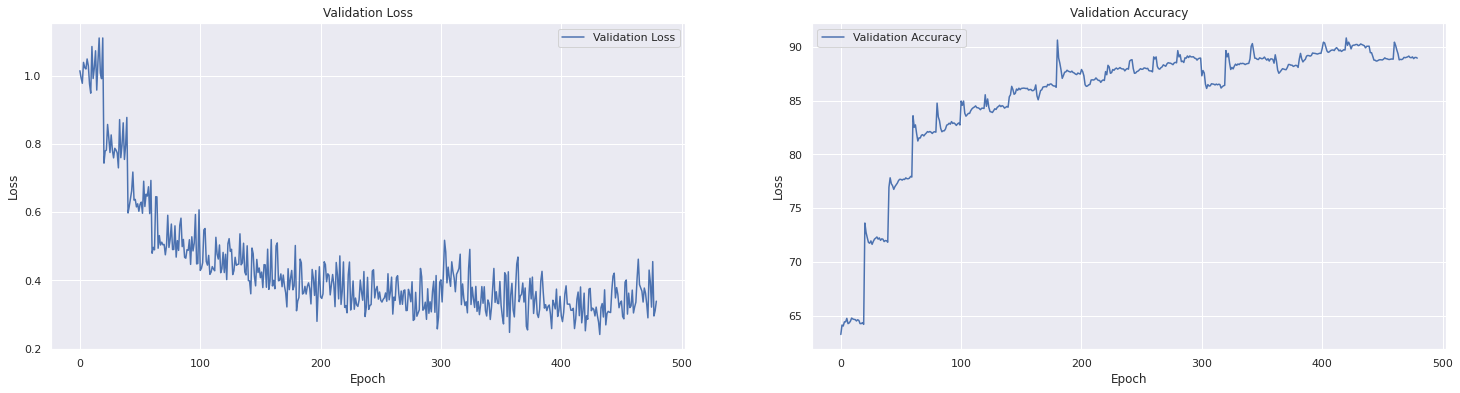

============================================================= Class Level Accuracy =========================================================================
Accuracy of airplane : 85 %
Accuracy of automobile : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 66 %
Accuracy of  deer : 90 %
Accuracy of   dog : 66 %
Accuracy of  frog : 84 %
Accuracy of horse : 94 %
Accuracy of  ship : 97 %
Accuracy of truck : 100 %
============================================== Random Misclassified Images ================================================================================


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 1105


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


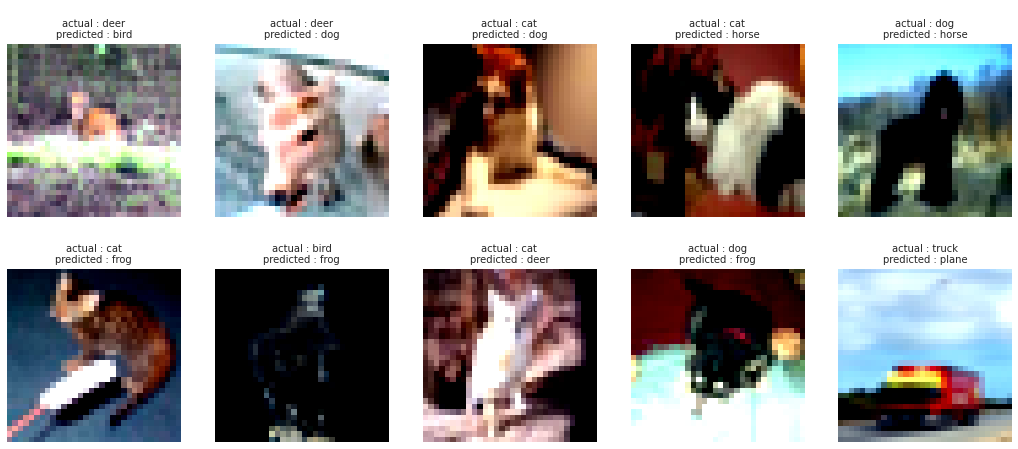

============================================== Grdadcam Misclassified Images =============================================================================


In [21]:
(wrong_images, net, target_layers,device) = model_main.run_experiments_custom_resnet_fc(start_lr = start_lr,
                                                                                        lrmax = max_lr,
                                                                                        max_holes = 4,
                                                                                        IsSGD= False,
                                                                                        ShowGradcam = False)

====================================================== Attempting Gradcam =================================================================================
torch.Size([20, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


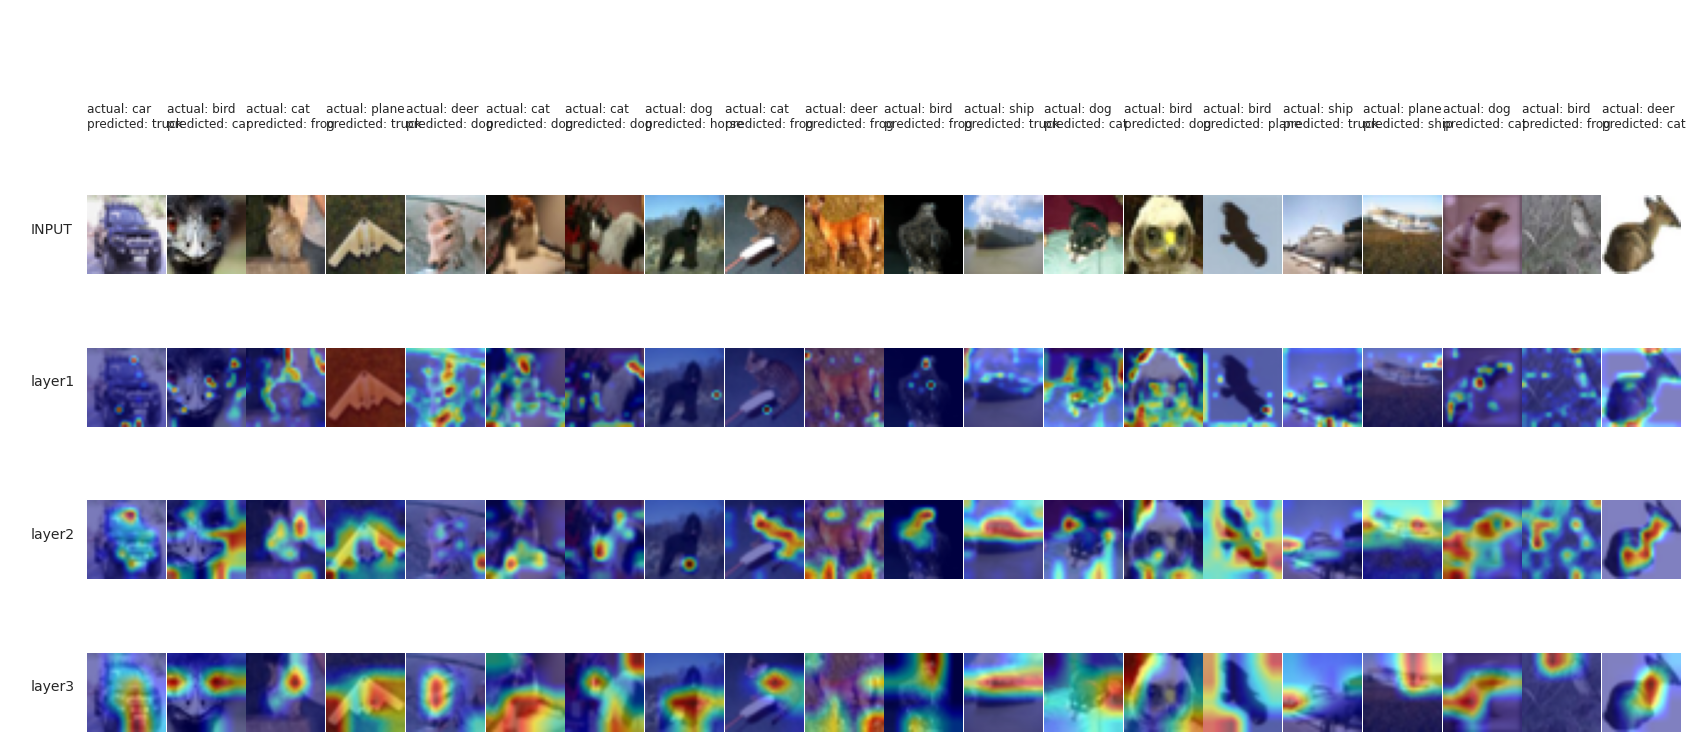

In [19]:
target_layers = ["layer1","layer2","layer3"]
model_main.get_gradcam_details(wrong_images, net, target_layers,device)

## Final Model

In [23]:
start_lr = 0.015
# max_lr = 0.0172685370741483 
max_lr = 0.018272685370741483  

Got all parser argument
================================================> Preparing data................
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
===========================================================> Building model Custom resnet.=========================================..............
CustomResNetFC(
  (prep_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1)

Loss=1.0406466722488403 Batch_id=97  LR=0.00061 Accuracy=48.67: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=1.2786208391189575 Batch_id=19 LR=0.00061 Accuracy=58.68: 100%|██████████| 20/20 [00:04<00:00,  4.85it/s]


Adjusting learning rate of group 0 to 6.0927e-04.

Epoch: 1


Loss=0.7833951115608215 Batch_id=97  LR=0.00061 Accuracy=67.49: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.7709842324256897 Batch_id=19 LR=0.00061 Accuracy=74.94: 100%|██████████| 20/20 [00:04<00:00,  4.88it/s]


Adjusting learning rate of group 0 to 6.0982e-04.

Epoch: 2


Loss=0.6780174374580383 Batch_id=97  LR=0.00061 Accuracy=75.66: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.6064265370368958 Batch_id=19 LR=0.00061 Accuracy=78.81: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


Adjusting learning rate of group 0 to 6.1073e-04.

Epoch: 3


Loss=0.6664482951164246 Batch_id=97  LR=0.00061 Accuracy=79.74: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.5236298441886902 Batch_id=19 LR=0.00061 Accuracy=82.19: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


Adjusting learning rate of group 0 to 6.1201e-04.

Epoch: 4


Loss=0.5057963728904724 Batch_id=97  LR=0.00061 Accuracy=82.37: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.47396206855773926 Batch_id=19 LR=0.00061 Accuracy=83.95: 100%|██████████| 20/20 [00:04<00:00,  4.87it/s]


Adjusting learning rate of group 0 to 6.1365e-04.

Epoch: 5


Loss=0.5015882253646851 Batch_id=97  LR=0.00061 Accuracy=84.38: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.5374842882156372 Batch_id=19 LR=0.00061 Accuracy=82.18: 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]


Adjusting learning rate of group 0 to 6.1565e-04.

Epoch: 6


Loss=0.4173966944217682 Batch_id=97  LR=0.00062 Accuracy=85.80: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.44997638463974 Batch_id=19 LR=0.00062 Accuracy=85.14: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


Adjusting learning rate of group 0 to 6.1802e-04.

Epoch: 7


Loss=0.4181428551673889 Batch_id=97  LR=0.00062 Accuracy=86.77: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.4139540195465088 Batch_id=19 LR=0.00062 Accuracy=85.77: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


Adjusting learning rate of group 0 to 6.2075e-04.

Epoch: 8


Loss=0.3991256356239319 Batch_id=97  LR=0.00062 Accuracy=87.66: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.36361372470855713 Batch_id=19 LR=0.00062 Accuracy=86.52: 100%|██████████| 20/20 [00:04<00:00,  4.87it/s]


Adjusting learning rate of group 0 to 6.2385e-04.

Epoch: 9


Loss=0.31517350673675537 Batch_id=97  LR=0.00062 Accuracy=89.02: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.4442049562931061 Batch_id=19 LR=0.00062 Accuracy=86.33: 100%|██████████| 20/20 [00:04<00:00,  4.95it/s]


Adjusting learning rate of group 0 to 6.2731e-04.

Epoch: 10


Loss=0.3664068281650543 Batch_id=97  LR=0.00063 Accuracy=89.24: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.30936217308044434 Batch_id=19 LR=0.00063 Accuracy=87.58: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


Adjusting learning rate of group 0 to 6.3113e-04.

Epoch: 11


Loss=0.2899329662322998 Batch_id=97  LR=0.00063 Accuracy=90.03: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.3378755748271942 Batch_id=19 LR=0.00063 Accuracy=87.57: 100%|██████████| 20/20 [00:04<00:00,  4.92it/s]


Adjusting learning rate of group 0 to 6.3532e-04.

Epoch: 12


Loss=0.3401070535182953 Batch_id=97  LR=0.00064 Accuracy=90.40: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.3330799639225006 Batch_id=19 LR=0.00064 Accuracy=87.63: 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]


Adjusting learning rate of group 0 to 6.3987e-04.

Epoch: 13


Loss=0.2962125241756439 Batch_id=97  LR=0.00064 Accuracy=90.91: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.3002583682537079 Batch_id=19 LR=0.00064 Accuracy=88.86: 100%|██████████| 20/20 [00:04<00:00,  4.88it/s]


Adjusting learning rate of group 0 to 6.4479e-04.

Epoch: 14


Loss=0.2694096863269806 Batch_id=97  LR=0.00064 Accuracy=90.84: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.39415431022644043 Batch_id=19 LR=0.00064 Accuracy=88.98: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


Adjusting learning rate of group 0 to 6.5007e-04.

Epoch: 15


Loss=0.20260079205036163 Batch_id=97  LR=0.00065 Accuracy=91.46: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.32703331112861633 Batch_id=19 LR=0.00065 Accuracy=89.28: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


Adjusting learning rate of group 0 to 6.5571e-04.

Epoch: 16


Loss=0.29530856013298035 Batch_id=97  LR=0.00066 Accuracy=91.72: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.415722131729126 Batch_id=19 LR=0.00066 Accuracy=87.61: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


Adjusting learning rate of group 0 to 6.6171e-04.

Epoch: 17


Loss=0.2937343120574951 Batch_id=97  LR=0.00066 Accuracy=91.93: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.33124756813049316 Batch_id=19 LR=0.00066 Accuracy=88.53: 100%|██████████| 20/20 [00:04<00:00,  4.85it/s]


Adjusting learning rate of group 0 to 6.6808e-04.

Epoch: 18


Loss=0.2692720293998718 Batch_id=97  LR=0.00067 Accuracy=92.08: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.27197396755218506 Batch_id=19 LR=0.00067 Accuracy=89.11: 100%|██████████| 20/20 [00:04<00:00,  4.88it/s]


Adjusting learning rate of group 0 to 6.7481e-04.

Epoch: 19


Loss=0.21367216110229492 Batch_id=97  LR=0.00067 Accuracy=92.61: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.37664076685905457 Batch_id=19 LR=0.00067 Accuracy=89.27: 100%|██████████| 20/20 [00:04<00:00,  4.91it/s]


Adjusting learning rate of group 0 to 6.8189e-04.

Epoch: 20


Loss=0.2836003303527832 Batch_id=97  LR=0.00068 Accuracy=92.63: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.3135916590690613 Batch_id=19 LR=0.00068 Accuracy=88.85: 100%|██████████| 20/20 [00:04<00:00,  4.84it/s]


Adjusting learning rate of group 0 to 6.8935e-04.

Epoch: 21


Loss=0.20260970294475555 Batch_id=97  LR=0.00069 Accuracy=92.60: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.31954193115234375 Batch_id=19 LR=0.00069 Accuracy=88.84: 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]


Adjusting learning rate of group 0 to 6.9716e-04.

Epoch: 22


Loss=0.24486757814884186 Batch_id=97  LR=0.00070 Accuracy=92.89: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]
Loss=0.2755872309207916 Batch_id=19 LR=0.00070 Accuracy=90.28: 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]


Saving..
Adjusting learning rate of group 0 to 7.0533e-04.

Epoch: 23


Loss=0.2430505007505417 Batch_id=97  LR=0.00071 Accuracy=93.07: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
Loss=0.28398263454437256 Batch_id=19 LR=0.00071 Accuracy=90.05: 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]


Adjusting learning rate of group 0 to 7.1387e-04.
============================================================ Training and Testing Performance ==============================================================


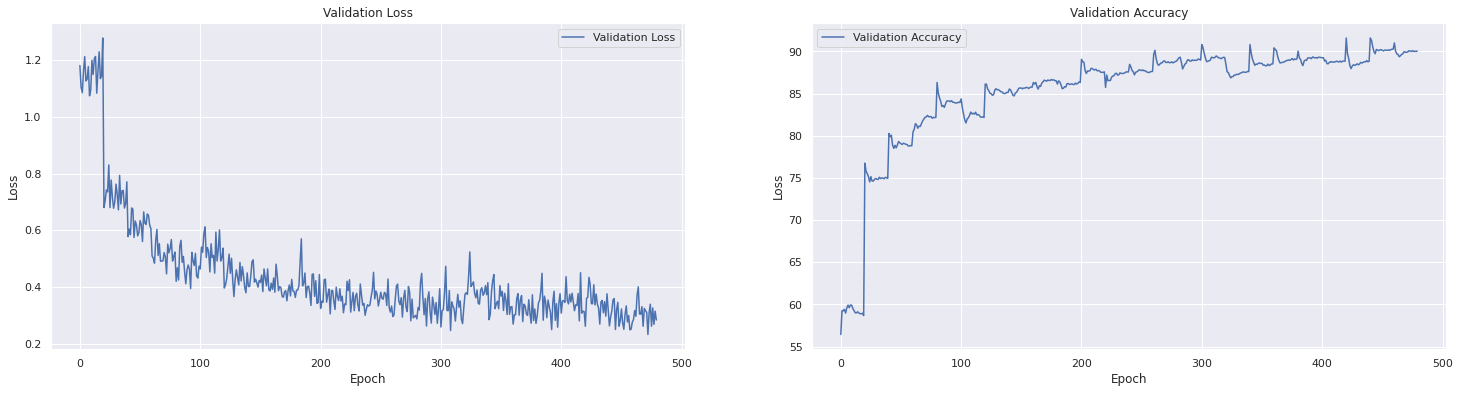

============================================================= Class Level Accuracy =========================================================================
Accuracy of airplane : 85 %
Accuracy of automobile : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 68 %
Accuracy of  deer : 92 %
Accuracy of   dog : 66 %
Accuracy of  frog : 81 %
Accuracy of horse : 91 %
Accuracy of  ship : 97 %
Accuracy of truck : 100 %
============================================== Random Misclassified Images ================================================================================


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 995


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


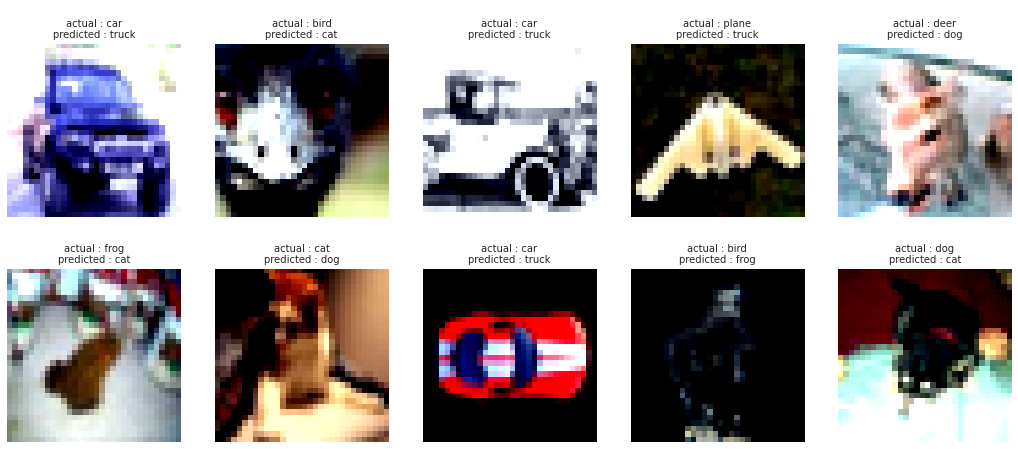

============================================== Grdadcam Misclassified Images =============================================================================


In [24]:
(wrong_images, net, target_layers,device) = model_main.run_experiments_custom_resnet_fc(start_lr = start_lr,
                                                                                        lrmax = max_lr,
                                                                                        max_holes = 3,
                                                                                        IsSGD= False,
                                                                                        ShowGradcam = False)